#実践8

## 実践8-1
* irisデータ（非常に有名な花の種類(アヤメ)のデータセット）を用いて基礎集計をしてください。
* 基礎集計からこのデータの説明をしてください。
* 基礎集計後、train, testに分割しtestデータを推論してください。
* データの読み込みは以下です。
```
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target
```
* モデルはDecisionTreeClassifierと課題と同じランダムフォレストの２種類を使ってください。
* accuracyを算出してください。

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# irisデータセットをロードする
iris = load_iris()
X, y = iris.data, iris.target

# 訓練データとテストデータに分割する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# DecisionTreeClassifierを作成する
clf = DecisionTreeClassifier()

# 訓練データを使って学習する
clf.fit(X_train, y_train)

# テストデータで予測する
y_pred = clf.predict(X_test)

# 正解率を計算する
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

In [1]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# irisデータセットをロードする
iris = load_iris()
X, y = iris.data, iris.target

# 訓練データとテストデータに分割する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForestClassifierを作成する
clf = RandomForestClassifier()

# 訓練データを使って学習する
clf.fit(X_train, y_train)

# テストデータで予測する
y_pred = clf.predict(X_test)

# 正解率を計算する
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


## 実践8-2
* digitsデータ(手書き文字の分類データ)を読み込んでください。
```
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target
```
* iris同様、決定木とランダムフォレストのモデルを用いて推論してください。
* 正解率(accuracy)を算出してください。


In [3]:
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# digitsデータを読み込む
digits = load_digits()
X, y = digits.data, digits.target

# データを訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 決定木モデルを作成して訓練
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# 決定木モデルの予測値を取得し、正解率を算出
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print(f"決定木モデルの正解率: {dt_accuracy:.2f}")

# ランダムフォレストモデルを作成して訓練
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# ランダムフォレストモデルの予測値を取得し、正解率を算出
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"ランダムフォレストモデルの正解率: {rf_accuracy:.2f}")

決定木モデルの正解率: 0.85
ランダムフォレストモデルの正解率: 0.98


# 実践9

## 実践9-1
* 以下のサンプルデータを作成してください。
```
data = {
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace'],
    'age': [25, 30, 35, 40, 28, None, 32],
    'city': ['New York', 'London', 'Paris', 'Tokyo', 'Berlin', 'Moscow', 'Sydney'],
    'score': [85, 92, 88, 75, 90, 82, None]
}
```
* 以下の前処理（含む可視化）を実施してください
    * サンプルデータ(name, age, city, score)を作成
    * データの確認(先頭行、データ型など)
    * 欠損値の確認と除外
    * 年齢の外れ値(25歳未満、45歳超)の除外
    * スコアの平均を計算し、新しい列に追加
    * 都市ごとのスコアの平均を計算
    * 年齢とスコアの関係を散布図で可視化
    * 都市ごとのスコアの分布を棒グラフで可視化




先頭5行:
      name   age      city  score
0    Alice  25.0  New York   85.0
1      Bob  30.0    London   92.0
2  Charlie  35.0     Paris   88.0
3    David  40.0     Tokyo   75.0
4      Eve  28.0    Berlin   90.0

データ型:
name      object
age      float64
city      object
score    float64
dtype: object

欠損値数: name     0
age      1
city     0
score    1
dtype: int64

都市ごとのスコアの平均:
city
Berlin      90.0
London      92.0
New York    85.0
Paris       88.0
Tokyo       75.0
Name: score, dtype: float64


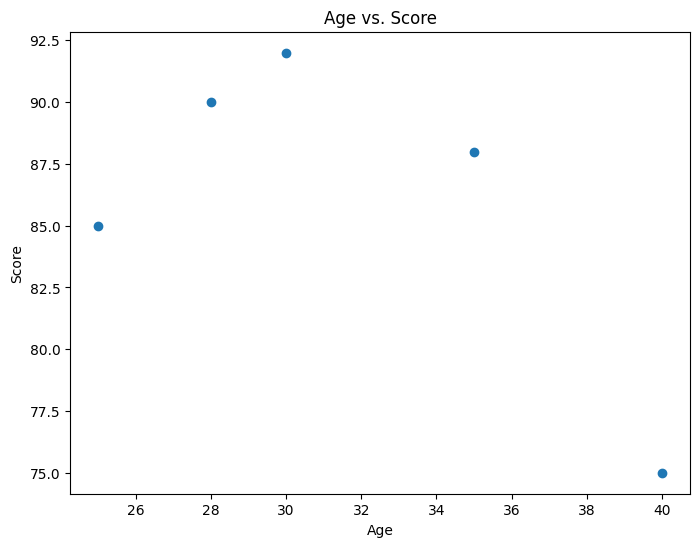

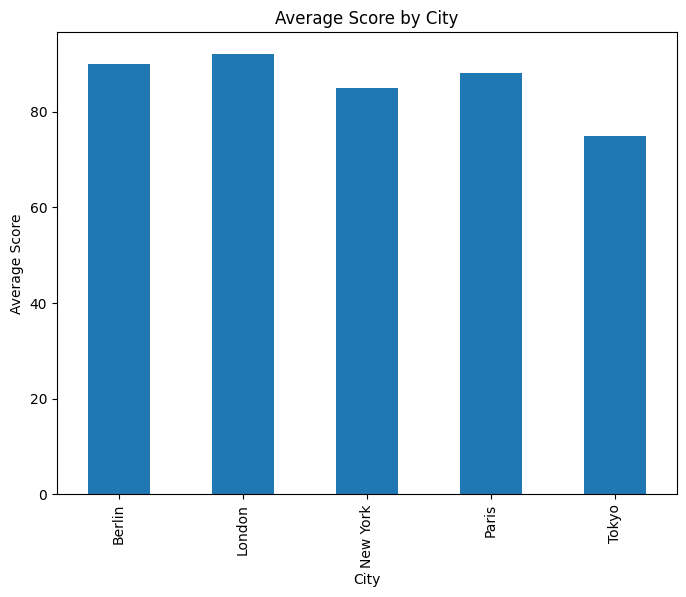

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# サンプルデータを作成
data = {
   'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace'],
   'age': [25, 30, 35, 40, 28, None, 32],
   'city': ['New York', 'London', 'Paris', 'Tokyo', 'Berlin', 'Moscow', 'Sydney'],
   'score': [85, 92, 88, 75, 90, 82, None]
}
df = pd.DataFrame(data)

# データの確認
print('先頭5行:')
display(df.head())
print('\nデータ型:')
display(df.dtypes)

# 欠損値の確認と除外
print(f'\n欠損値数: {df.isna().sum()}')
df = df.dropna()

# 年齢の外れ値の除外
df = df[(df['age'] >= 25) & (df['age'] <= 45)]

# スコアの平均を計算し、新しい列に追加
df['avg_score'] = df['score'].mean()

# 都市ごとのスコアの平均を計算
print('\n都市ごとのスコアの平均:')
display(df.groupby('city')['score'].mean())

# 年齢とスコアの関係を散布図で可視化
plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['score'])
plt.title('Age vs. Score')
plt.xlabel('Age')
plt.ylabel('Score')
plt.show()

# 都市ごとのスコアの分布を棒グラフで可視化
plt.figure(figsize=(8, 6))
df.groupby('city')['score'].mean().plot(kind='bar')
plt.title('Average Score by City')
plt.xlabel('City')
plt.ylabel('Average Score')
plt.show()

## 実践9-2(応用)
* seabornのtipsデータをロードしてください。
```
import seaborn as sns
# データセットのロード
tips = sns.load_dataset("tips")
```
    * total_bill: 会計総額
    * tip: 支払われたチップ
    * sex: 支払い主の性別
    * smoker: 喫煙者かどうか
    * day: 来店日(Sun, Sat, Thur, Fri)
    * time: 時間帯(Dinner, Lunch)
    * size: 同伴者の人数
* このデータの特徴を確認して説明してください。(基礎分析)
* 外れ値がないか確認してください。
* チップの割合(%)を新しい列として作成してください
* "smoker"カラムを機械学習に適した値(1 or 0) に変換してください。
* dayカラムの型を確認し、category型に変換してください。(ヒント: astypeを利用する)
* チップの割合の分布を可視化してください。その際、可能ならseabornを利用してください。
* sns.catplot(棒グラフ)を使ってチップの割合以外を可視化してください。
* 何かしら不要と思われる列を削除してください。



   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-n

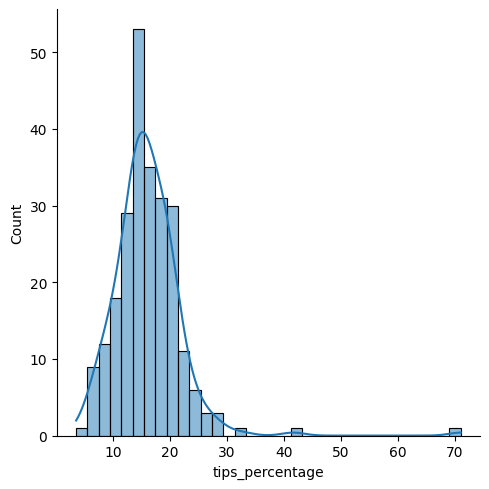

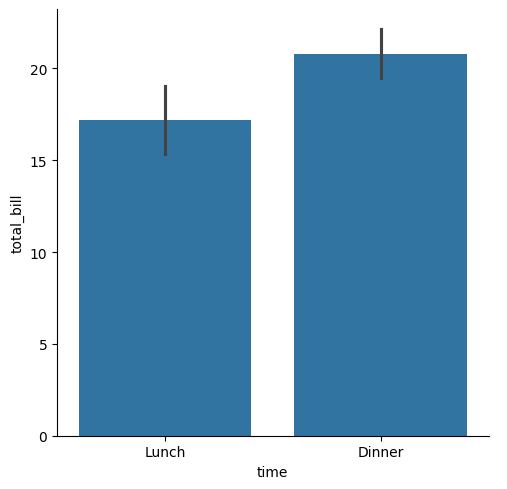

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# データセットのロード
tips = sns.load_dataset("tips")

# データの基礎分析
print(tips.head())  # 先頭5行を表示
print(tips.describe())  # 量的データの基本統計量（外れ値確認含む）
print(tips.info())  # データの概要(型,欠損値数など)

# チップの割合(%)を新しい列として追加
tips["tips_percentage"] = tips["tip"] / tips["total_bill"] * 100

# "smoker"カラムを0,1に変換
tips["smoker"] = tips["smoker"].map({"Yes": 1, "No": 0})

# dayのデータ型をcategory型に変換
tips["day"] = tips["day"].astype("category")

# チップの割合の分布を可視化
sns.displot(tips["tips_percentage"], kde=True)
plt.show()

# 時間帯別の支払い額を可視化
sns.catplot(x="time", y="total_bill", kind="bar", data=tips)
plt.show()

# 不要な列を削除
tips = tips.drop("sex", axis=1)


# 実践11

## 実践11-1:
* 以下のデータを読み込んでください。
```
from sklearn.datasets import load_wine
data = load_wine(as_frame=True)
X = data.data
y = data.target
```
* 各変数の特徴（含む欠損・外れ値）を可視化や数値計算等で確認してください。必要に応じて加工してください。
* 標準化をしてください。
* （応用：可能であれば）多重共線性を確認し、必要に応じて変数を削除してください。その結果でモデルを変更してください。ヒント: statsmodelのvariance_inflation_factorを用いてVIFを算出する。
* 回帰モデルを作成してください。
* 推論結果を確認してください。その際、以下の確認をしてください。
    * 決定係数 (R^2)
    * RMSE


In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# データの読み込み
from sklearn.datasets import load_wine
data = load_wine(as_frame=True)
X = data.data
y = data.target

# 変数の特徴確認
print('変数の概要:')
print(X.describe())

# 欠損値の確認
print(f'\n欠損値数: {X.isna().sum().sum()}')

# 外れ値の確認
outlier_threshold = 3  # 外れ値のしきい値 (3 * 標準偏差)
for col in X.columns:
    mean = X[col].mean()
    std = X[col].std()
    lower_bound = mean - outlier_threshold * std
    upper_bound = mean + outlier_threshold * std
    outliers = X[(X[col] < lower_bound) | (X[col] > upper_bound)]
    if not outliers.empty:
        print(f"変数 {col} の外れ値の数: {len(outliers)}")

# 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# VIF
## 分散膨張係数(VIF)による多重共線性の確認
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif["features"] = X.columns
vif = vif.sort_values(by="VIF Factor", ascending=False)
print(f'\n分散膨張係数(VIF):')
print(vif)

## 多重共線性が高い変数の削除
high_vif = vif[vif["VIF Factor"] > 10].features.tolist()
print(f'\n多重共線性が高い変数: {high_vif}')
X_reduced_scaled = X_scaled[:, [i for i in range(X_scaled.shape[1]) if X.columns[i] not in high_vif]]

# 回帰モデルの作成と学習
model = LinearRegression()
model.fit(X_reduced_scaled, y)

# 推論結果
y_pred = model.predict(X_reduced_scaled)
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f'\n決定係数 (R^2): {r2:.2f}')
print(f'RMSE: {rmse:.2f}')

変数の概要:
          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min     

## 実践11-2 (応用)
* 標準化以外の代表的な変換について調べ、標準化(StandardScaler)との違いを記載してください。
* 上記実践1と同じ問題で別の変換手法を用いて評価してください。

### 標準化以外の代表的な変換手法

* 正規化 (Normalization):
    
    - 目的: 変数の値を0から1の範囲にスケーリングする
    - 種類:
        - Min-Max正規化: 変数の値を最小値0、最大値1の範囲にスケーリング
        - L1正規化: 各サンプルの絶対値の合計を1にするようスケーリング
        - L2正規化: 各サンプルのベクトルノルムを1にするようスケーリング

    - 利点: 外れ値の影響を抑える、変数間のスケールを揃える
    - 欠点: 外れ値の影響を完全に除去できない、変数間の分散情報が失われる

* 対数変換 (Log Transformation):

    - 目的: 右裾の長い分布を対数をとることで正規化する
    - 手法: 変数の値に対数関数(通常は自然対数)を適用する
    - 利点: 右裾の長い分布を正規分布に近付ける、大きな値の影響を抑える
    - 欠点: 負の値や0の値が存在する場合に適用できない

* ボックスコックス変換 (Box-Cox Transformation):

    - 目的: 正規分布に近い分布に変換する
    - 手法: 変数の値に対して最適なパラメータλでべき乗変換を行う
    - 利点: より一般的な変換で正規性を高められる
    - 欠点: 変換パラメータλの選択が難しい、負の値が存在すると適用できない
        - 参考: 負の値に適用するにはYeo-Johnsonという手法を用いるとよい

* カテゴリ変数のエンコーディング:

    - 目的: カテゴリ変数を数値に変換する
    - 手法: ラベルエンコーディング、ワンホットエンコーディングなど
    - 利点: 機械学習モデルで扱えるようになる
    - 欠点: カテゴリ間の関係が失われる(ラベルエンコーディング)、次元が増える(ワンホットエンコーディング)

* 標準化(StandardScaler)との違い

    - 標準化は、変数の平均を0、分散を1にスケーリングする手法です。これにより、変数間のスケールが揃い、外れ値の影響が軽減されます。標準化は、線形モデルや距離ベースのモデルで有効です。
    - 一方、他の変換手法は以下のような特徴があります:

        - 正規化: 値の範囲を0から1にスケーリングするが、分散情報は失われる
        - 対数変換: 右裾の長い分布を正規分布に近付けるが、負値や0がある場合は適用できない
        - ボックスコックス変換: より一般的な変換で正規性を高められるが、パラメータ選択が難しい
        - カテゴリ変数のエンコーディング: カテゴリ変数を数値化するが、カテゴリ間の関係が失われる可能性がある

データの分布の形状や変数の種類に応じて、適切な変換手法を選択する必要があります。

In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# データの読み込み
from sklearn.datasets import load_wine
data = load_wine(as_frame=True)
X = data.data
y = data.target

# 対数変換
X_log = np.log1p(X)  # 0の値がある場合に対応するため、np.log1p(x) = log(1 + x)を使用

# 変数の特徴確認
print('変数の概要(対数変換後):')
print(X_log.describe())

# 欠損値の確認
print(f'\n欠損値数: {X_log.isna().sum().sum()}')

# 分散膨張係数(VIF)による多重共線性の確認
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_log.values, i) for i in range(X_log.shape[1])]
vif["features"] = X_log.columns
vif = vif.sort_values(by="VIF Factor", ascending=False)
print(f'\n分散膨張係数(VIF):')
print(vif)

# 多重共線性が高い変数の削除(ただし今の変換だとほぼ全て高くなってしまうので、VIFの値を30へ変更)
high_vif = vif[vif["VIF Factor"] > 30].features.tolist()
print(f'\n多重共線性が高い変数: {high_vif}')
X_reduced_log = X_log.drop(high_vif, axis=1)

# 標準化
scaler = StandardScaler()
X_reduced_scaled = scaler.fit_transform(X_reduced_log)

# 回帰モデルの作成と学習
model = LinearRegression()
model.fit(X_reduced_scaled, y)

# 推論結果
y_pred = model.predict(X_reduced_scaled)
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f'\n決定係数 (R^2): {r2:.2f}')
print(f'RMSE: {rmse:.2f}')

変数の概要(対数変換後):
          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean     2.637420    1.154950    1.210498           3.006665    4.603203   
std      0.058238    0.309582    0.083078           0.166601    0.135300   
min      2.487404    0.553885    0.858662           2.451005    4.262680   
25%      2.592452    0.956471    1.166271           2.901422    4.488636   
50%      2.642622    1.052567    1.211941           3.020425    4.595120   
75%      2.686316    1.406682    1.269057           3.113515    4.682131   
max      2.761907    1.916923    1.442202           3.433987    5.093750   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        1.174000    1.047941              0.304769         0.927749   
std         0.194288    0.359733              0.090194         0.222247   
m

## 実践11-3(応用)
* 11-1と同じデータに対してRidge, Lasso, ElasticNetを適用して評価してください。
* 多重共線性はRidge/Lasso/ElasticNet側で弱めるので明示的な記載は不要です。


In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# データの読み込み
from sklearn.datasets import load_wine
data = load_wine(as_frame=True)
X = data.data
y = data.target

# 変数の特徴確認
print('変数の概要:')
print(X.describe())

# 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ridge回帰
ridge = Ridge(alpha=1.0)
ridge.fit(X_scaled, y)
y_pred_ridge = ridge.predict(X_scaled)
r2_ridge = r2_score(y, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y, y_pred_ridge))
print(f'\nRidge回帰 - 決定係数 (R^2): {r2_ridge:.2f}, RMSE: {rmse_ridge:.2f}')

# Lasso回帰
lasso = Lasso(alpha=1.0)
lasso.fit(X_scaled, y)
y_pred_lasso = lasso.predict(X_scaled)
r2_lasso = r2_score(y, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y, y_pred_lasso))
print(f'\nLasso回帰 - 決定係数 (R^2): {r2_lasso:.2f}, RMSE: {rmse_lasso:.2f}')

# ElasticNet回帰
elasticnet = ElasticNet(alpha=1.0, l1_ratio=0.5)
elasticnet.fit(X_scaled, y)
y_pred_elasticnet = elasticnet.predict(X_scaled)
r2_elasticnet = r2_score(y, y_pred_elasticnet)
rmse_elasticnet = np.sqrt(mean_squared_error(y, y_pred_elasticnet))
print(f'\nElasticNet回帰 - 決定係数 (R^2): {r2_elasticnet:.2f}, RMSE: {rmse_elasticnet:.2f}')

変数の概要:
          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min     

# 実践12

## 実践12-1 (pandasの復習)
* 「7. 予測モデルの評価」で実行したclassification_reportをdataframeに格納してください。行名・列名もわかるようにしてください。その後csvとして保存してください。
* 実務でもdataframeに格納してcsvへ保存するケースはあります。

## 実践12-2(matplotlib, seabornの復習 & 一部発展)
* load_breast_cancerを講義テキストでは
```
df.hist(figsize=(20, 15), bins=30)
```
として実施しました。
* これをseabornのstripplotを使って同様に表示してください。その際、全特徴量を1つのfigとして表示し、図を保存してください。
* ポイント: subplotsを用いること & for文を使ってstripplotをおこなう。
* 参考) 実務でもこのように全特徴量に対して一斉の可視化を行うケース(pandasの可視化だけでは対応できないケース)はあります。一度ロジックを組み立てておけば汎用的に使えるので覚えておくと便利です。
* 更に発展させると、この処理のベースを関数/クラスのメソッド化しておき、dataframeを渡すだけにしておくと更に利便性が高まります。


## 実践12-3
- 「7. 予測モデルの評価」の流れで混同行列を作成し表示してください。(classification_reportの元となる行列で実務でも利用します)

## 実践12-4(マルチクラス分類)
* irisデータを取得してください。
```
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
```
* irisデータに対して学習・推論を実施してください。モデルは任意で構いませんが、木構造以外のアルゴリズムの場合は標準化を視野に入れてください(厳密にはデータによっては標準化が不要な場合もありますが、基本は実施すべきです)。木構造の場合はexport_text等で条件分岐を出力してください。
* 混同行列や評価指標を算出してください。


# 実践13

## 実践13-1
* K-Meansクラスタリングによる品種の分類
    * irisデータセットをロードする
    * 説明変数(4つの特徴量)を抽出する
    * K-Means法によりクラスタリングを行う
    * エルボー法で最適なクラスタ数を決定する
    * クラスタリング結果と実際の品種ラベルを比較し、正解率を計算する

## 実践13-2
* K-Means以外のクラスタリング手法による品種の分類
    * 13-1をK-Means以外の手法で実施する(階層的クラスタリング・DBSCAN・etc)
    * クラスタリング結果と実際の品種ラベルを比較し、正解率を計算する

## 実践13-3



```
from sklearn.datasets import load_wine
wine = load_wine()
X, y = wine.data, wine.target
```

上記のデータを使ってクラスタリングを実施してください。
特徴量のスケーリング等に注意して実施してください。
本データは実際には正解データ(ラベル数)が付与されています。
クラスタリングである程度分類できるか正解率を計算してください。

# 実践15

## 実践15-1
以下のデータはWikipediaページビューデータです。１年先までの時系列予測と評価をおこなってください。


```
data = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
```